In [256]:
#empezamos importando las librerias
import numpy as np
import pandas as pd 
import scipy.stats as stats
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima.model import ARIMA

%matplotlib inline

In [257]:
#fijamos tamaño de graficas
plt.rcParams['figure.figsize'] = [10, 7.5]

In [258]:
#eliminamos las advertencias
import warnings
warnings.filterwarnings("ignore")

In [259]:
IGAE = pd.read_csv('https://raw.githubusercontent.com/aaron-v-kane/Tareas_EstadisticaAplicada_15/main/IGAE.csv')

In [260]:
IGAE = IGAE.drop(['Periodo'], axis=1)

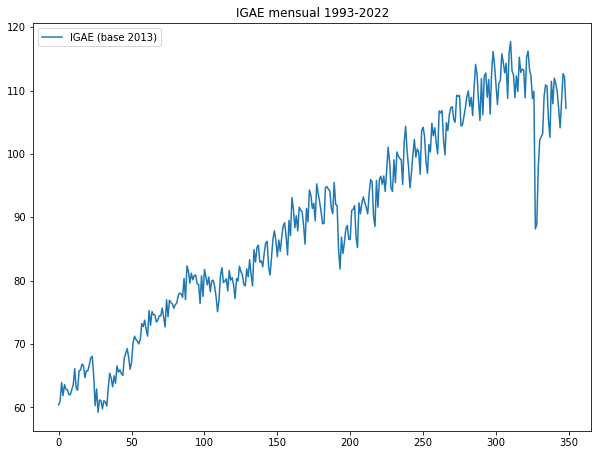

In [261]:
IGAE.plot()
plt.title('IGAE mensual 1993-2022')
plt.show()

La serie no parece ser estacionaria, la varianza no es constante, así como tampoco lo es la media 

In [262]:
#Realizamos la prueba de Raíces Unitarias (ADF)
result_adf = adfuller(IGAE['IGAE (base 2013)'])
if result_adf[1] < 0.05:
    
    print(f'con un un p-value={result_adf[1].round(3)}\n Se rechaza hipótesis nula, serie estacionaria') 
    
else:
    
    print(f'con un un p-value = {result_adf[1].round(3)}\n NO se rechaza hipótesis nula, serie no estacionaria') 

con un un p-value = 0.761
 NO se rechaza hipótesis nula, serie no estacionaria


<AxesSubplot:>

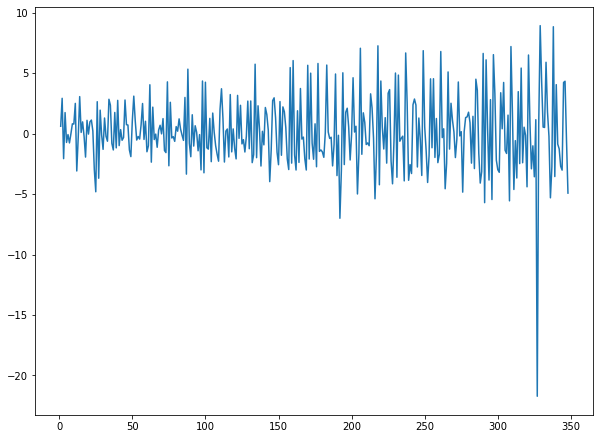

In [263]:
IGAE_EST = IGAE['IGAE (base 2013)'] - IGAE['IGAE (base 2013)'].shift()
IGAE_EST.plot()

In [264]:
#eliminamos los Nan
IGAE_EST = IGAE_EST.dropna()

In [265]:
IGAE_EST = IGAE_EST.reset_index()
IGAE_EST = IGAE_EST.drop(['index'], axis=1)
IGAE_EST

,IGAE (base 2013)
0,0.61
1,2.92
2,-2.07
3,1.74
4,-0.73
...,...
343,-3.02
344,4.23
345,4.33
346,-0.54


In [266]:
#Realizamos la prueba de Raíces Unitarias (ADF)
result_adf = adfuller(IGAE_EST)
if result_adf[1] < 0.05:
    
    print(f'con un un p-value={result_adf[1].round(3)}\n Se rechaza hipótesis nula, serie estacionaria') 
    
else:
    
    print(f'con un un p-value = {result_adf[1].round(3)}\n NO se rechaza hipótesis nula, serie no estacionaria') 

con un un p-value=0.0
 Se rechaza hipótesis nula, serie estacionaria


La prueba ADF nos dice que nuestra serie ya es estacionaria y a la vez con esto obtenemos su grado de integración, el cual es 1, ya que ocupamos diferenciarla solo una vez para volverla estacionaria.

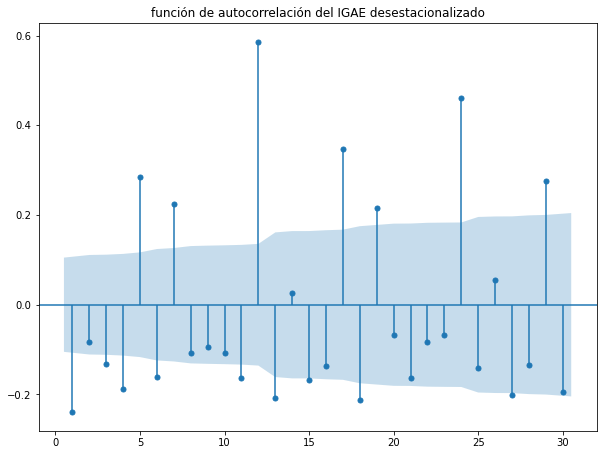

In [267]:
#grafica de autocorrelación ACF
plot_acf(IGAE_EST, zero=False, lags=30)
plt.title('función de autocorrelación del IGAE desestacionalizado')
plt.show()

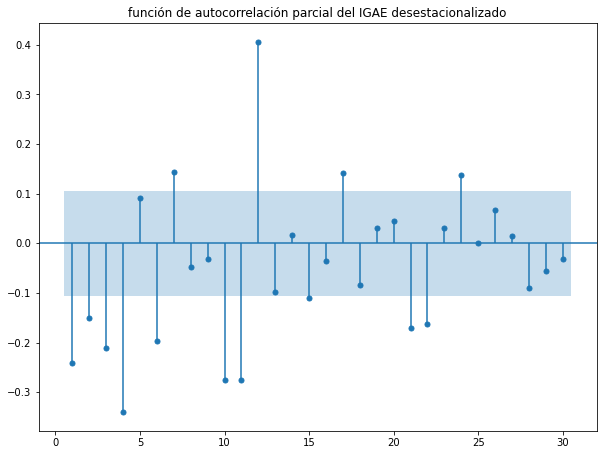

In [268]:
#grafica de autocorrelación parcial PACF
plot_pacf(IGAE_EST, zero=False, lags=30)
plt.title('función de autocorrelación parcial del IGAE desestacionalizado')
plt.show()

Los rezagos indican apróximadamente un ARMA(29,24), por motivos de falta de capacidad del ordenador se calcularán los modelos hasta un ARMA(15,15)

In [114]:
ic = {}
for ar in range(16):
    for ma in range(16):
        print(f"AR: {ar}, MA: {ma}")
        modelo = ARIMA(IGAE_EST, order=(ar,0,ma))
        resultado = modelo.fit()
        ic[(ar, ma)] = [resultado.aic, resultado.bic]

ic = pd.DataFrame(ic, index=["AIC", "BIC"]).T
ic.index = ic.index.set_names(["AR", "MA"])
ic

AR: 0, MA: 0
AR: 0, MA: 1
AR: 0, MA: 2
AR: 0, MA: 3
AR: 0, MA: 4
AR: 0, MA: 5
AR: 0, MA: 6
AR: 0, MA: 7
AR: 0, MA: 8
AR: 0, MA: 9
AR: 0, MA: 10
AR: 0, MA: 11
AR: 0, MA: 12
AR: 0, MA: 13
AR: 0, MA: 14
AR: 0, MA: 15
AR: 1, MA: 0
AR: 1, MA: 1
AR: 1, MA: 2
AR: 1, MA: 3
AR: 1, MA: 4
AR: 1, MA: 5
AR: 1, MA: 6
AR: 1, MA: 7
AR: 1, MA: 8
AR: 1, MA: 9
AR: 1, MA: 10
AR: 1, MA: 11
AR: 1, MA: 12
AR: 1, MA: 13
AR: 1, MA: 14
AR: 1, MA: 15
AR: 2, MA: 0
AR: 2, MA: 1
AR: 2, MA: 2
AR: 2, MA: 3
AR: 2, MA: 4
AR: 2, MA: 5
AR: 2, MA: 6
AR: 2, MA: 7
AR: 2, MA: 8
AR: 2, MA: 9
AR: 2, MA: 10
AR: 2, MA: 11
AR: 2, MA: 12
AR: 2, MA: 13
AR: 2, MA: 14
AR: 2, MA: 15
AR: 3, MA: 0
AR: 3, MA: 1
AR: 3, MA: 2
AR: 3, MA: 3
AR: 3, MA: 4
AR: 3, MA: 5
AR: 3, MA: 6
AR: 3, MA: 7
AR: 3, MA: 8
AR: 3, MA: 9
AR: 3, MA: 10
AR: 3, MA: 11
AR: 3, MA: 12
AR: 3, MA: 13
AR: 3, MA: 14
AR: 3, MA: 15
AR: 4, MA: 0
AR: 4, MA: 1
AR: 4, MA: 2
AR: 4, MA: 3
AR: 4, MA: 4
AR: 4, MA: 5
AR: 4, MA: 6
AR: 4, MA: 7
AR: 4, MA: 8
AR: 4, MA: 9
AR: 4, MA: 10


AIC          BIC
AR MA                          
0  0   1770.976868  1778.681273
   1   1736.727177  1748.283785
   2   1715.625756  1731.034565
   3   1708.248616  1727.509628
   4   1710.064489  1733.177704
...            ...          ...
15 11  1536.857131  1644.718800
   12  1529.311802  1641.025674
   13  1526.873624  1642.439698
   14  1528.041031  1647.459308
   15  1527.760875  1651.031355

[256 rows x 2 columns]

Ordenando los valores de acuerdo al BIC

In [269]:
ic.sort_values('BIC', ascending = True)

AIC          BIC
AR MA                          
9  10  1520.978976  1601.875228
   9   1525.079723  1602.123773
10 10  1521.394538  1606.142992
11 10  1518.746597  1607.347254
6  10  1539.708523  1609.048168
...            ...          ...
0  1   1736.727177  1748.283785
3  0   1732.894993  1752.156006
2  0   1746.253006  1761.661816
1  0   1752.263656  1763.820264
0  0   1770.976868  1778.681273

[256 rows x 2 columns]

Ordenando los valores de acuerdo al AIC

In [270]:
ic.sort_values('AIC', ascending = True)

AIC          BIC
AR MA                          
12 12  1518.669529  1618.826793
   14  1518.708312  1626.569982
11 10  1518.746597  1607.347254
12 13  1519.141193  1623.150660
13 13  1519.302199  1627.163868
...            ...          ...
3  0   1732.894993  1752.156006
0  1   1736.727177  1748.283785
2  0   1746.253006  1761.661816
1  0   1752.263656  1763.820264
0  0   1770.976868  1778.681273

[256 rows x 2 columns]

Los modelos a probar serán:

    ARMA(9,10), sugerido por el BIC
Y

    ARMA(12,12), sugerido por el AIC

Observamos el resumen del modelo ARIMA(9,,1,10)

In [271]:
# estimamos un ARIMA (9,1,10)
modelo1 = ARIMA(IGAE, order=(9, 1, 10))
resultado1 = modelo1.fit()
resultado1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:       IGAE (base 2013)   No. Observations:                  349
Model:                ARIMA(9, 1, 10)   Log Likelihood                -748.455
Date:                Sun, 27 Mar 2022   AIC                           1536.911
Time:                        21:44:49   BIC                           1613.955
Sample:                             0   HQIC                          1567.584
                                - 349                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8728      0.956     -0.913      0.361      -2.746       1.001
ar.L2         -1.1932      1.792     -0.666      0.505      -4.705       2.318
ar.L3         -0.6025      2.908     -0.207      0.836      -6.302       5.097
ar.L4         -0.5771      3.431     -0.168      0.866      -7.301       6.147
ar.L5          0.4944      3.930      0.126      0.900      -7.207       8.196
ar.L6          0.4455      3.384      0.132      0.895      -6.187       7.078
ar.L7          1.1425      2.877      0.397      0.691      -4.496       6.781
ar.L8          0.8356      1.726      0.484      0.628      -2.547       4.218
ar.L9          0.8870      0.882      1.006      0.315      -0.841       2.615
ma.L1          0.6850      0.958      0.715      0.475      -1.193       2.563
ma.L2          0.9644      1.626      0.593      0.553      -2.222       4.150
ma.L3          0.3594      2.519      0.143      0.887      -4.577       5.296
ma.L4          0.3731      2.790      0.134      0.894      -5.095       5.841
ma.L5         -0.6290      3.108     -0.202      0.840      -6.720       5.462
ma.L6         -0.3628      2.415     -0.150      0.881      -5.097       4.371
ma.L7         -1.0315      2.005     -0.515      0.607      -4.961       2.898
ma.L8         -0.6172      0.971     -0.636      0.525      -2.520       1.286
ma.L9         -0.5588      0.373     -1.497      0.134      -1.290       0.173
ma.L10         0.1476      0.200      0.736      0.462      -0.245       0.540
sigma2         4.1810      0.221     18.906      0.000       3.748       4.614
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):             17437.19
Prob(Q):                              0.75   Prob(JB):                         0.00
Heteroskedasticity (H):               4.15   Skew:                            -3.13
Prob(H) (two-sided):                  0.00   Kurtosis:                        37.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Podemos ver como ningún coeficiente llega a ser significativo

In [272]:
# estimamos un ARIMA (12,1,12)
modelo2 = ARIMA(IGAE, order=(12, 1, 12))
resultado2 = modelo2.fit()
resultado2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:       IGAE (base 2013)   No. Observations:                  349
Model:               ARIMA(12, 1, 12)   Log Likelihood                -742.627
Date:                Sun, 27 Mar 2022   AIC                           1535.254
Time:                        21:45:05   BIC                           1631.559
Sample:                             0   HQIC                          1573.595
                                - 349                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1013      0.178     -0.570      0.568      -0.449       0.247
ar.L2          0.1688      0.179      0.941      0.347      -0.183       0.520
ar.L3          0.0266      0.172      0.155      0.877      -0.311       0.364
ar.L4         -0.0678      0.165     -0.412      0.680      -0.390       0.255
ar.L5          0.2127      0.194      1.099      0.272      -0.167       0.592
ar.L6         -0.0766      0.172     -0.444      0.657      -0.414       0.261
ar.L7         -0.1026      0.173     -0.595      0.552      -0.441       0.236
ar.L8          0.0685      0.167      0.410      0.682      -0.259       0.396
ar.L9         -0.1493      0.152     -0.984      0.325      -0.447       0.148
ar.L10        -0.2325      0.147     -1.576      0.115      -0.522       0.057
ar.L11         0.0915      0.171      0.535      0.593      -0.244       0.427
ar.L12         0.8416      0.152      5.544      0.000       0.544       1.139
ma.L1         -0.0300      0.179     -0.168      0.867      -0.380       0.320
ma.L2         -0.2566      0.182     -1.409      0.159      -0.614       0.100
ma.L3         -0.0546      0.160     -0.341      0.733      -0.369       0.260
ma.L4         -0.0070      0.145     -0.048      0.962      -0.292       0.278
ma.L5         -0.2105      0.174     -1.208      0.227      -0.552       0.131
ma.L6          0.1816      0.153      1.186      0.236      -0.118       0.482
ma.L7          0.0197      0.145      0.136      0.892      -0.264       0.304
ma.L8         -0.0715      0.124     -0.578      0.563      -0.314       0.171
ma.L9          0.2541      0.125      2.037      0.042       0.010       0.498
ma.L10         0.1186      0.129      0.918      0.359      -0.135       0.372
ma.L11        -0.1614      0.146     -1.106      0.269      -0.447       0.125
ma.L12        -0.5819      0.123     -4.728      0.000      -0.823      -0.341
sigma2         4.0548      0.236     17.161      0.000       3.592       4.518
===================================================================================
Ljung-Box (L1) (Q):                   0.87   Jarque-Bera (JB):             17952.86
Prob(Q):                              0.35   Prob(JB):                         0.00
Heteroskedasticity (H):               3.99   Skew:                            -3.19
Prob(H) (two-sided):                  0.00   Kurtosis:                        37.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Al diferencia del modelo anterior, algunos coeficientes llegan a ser significativos, mas son muy pocos

In [273]:
# vamos a estimar la serie con el modelo ARIMA
IGAE['pronostico_1'] = resultado1.predict()
IGAE['pronostico_2'] = resultado2.predict()

In [275]:
#Estimemos MAPE, MAD y MSD para ARIMA(9,1,10)
MAPE_1 = 0
MSD_1 = 0
for t in range(0,348):
    MAPE_1 = MAPE_1 + abs(((IGAE.at[t,'IGAE (base 2013)'] - IGAE.at[t,'pronostico_1'])/IGAE.at[t,'IGAE (base 2013)']))
    MSD_1 = MSD_1 + abs((IGAE.at[t,'IGAE (base 2013)'] - IGAE.at[t,'pronostico_1'])**2)
    
MAPE_1 = MAPE_1/349
MSD_1 = MSD_1/349

print(f'el valor de MAPE para el modelo ARIMA(9,1,10):{MAPE_1}')
print(f'el valor de MSD para el modelo ARMA(9,1,10):{MSD_1}')

el valor de MAPE para el modelo ARIMA(9,1,10):0.01790151272829255
el valor de MSD para el modelo ARMA(9,1,10):14.663743929633075


In [276]:
#Estimemos MAPE, MAD y MSD para ARIMA(12,1,12)
MAPE_2 = 0
MSD_2 = 0
for t in range(0,348):
    MAPE_2 = MAPE_2 + abs(((IGAE.at[t,'IGAE (base 2013)'] - IGAE.at[t,'pronostico_2'])/IGAE.at[t,'IGAE (base 2013)']))
    MSD_2 = MSD_2 + abs((IGAE.at[t,'IGAE (base 2013)'] - IGAE.at[t,'pronostico_2'])**2)
    
MAPE_2 = MAPE_2/349
MSD_2 = MSD_2/349

print(f'el valor de MAPE para el modelo ARIMA(12,1,12):{MAPE_2}')
print(f'el valor de MSD para el modelo ARMA(12,1,12):{MSD_2}')

el valor de MAPE para el modelo ARIMA(12,1,12):0.0175387366127089
el valor de MSD para el modelo ARMA(12,1,12):14.533769737065214


El modelo ARIMA(12,1,12) da mejores valores, por margenes muy pequeños, pero estimaremos con este modelo para futuros pronosticos.

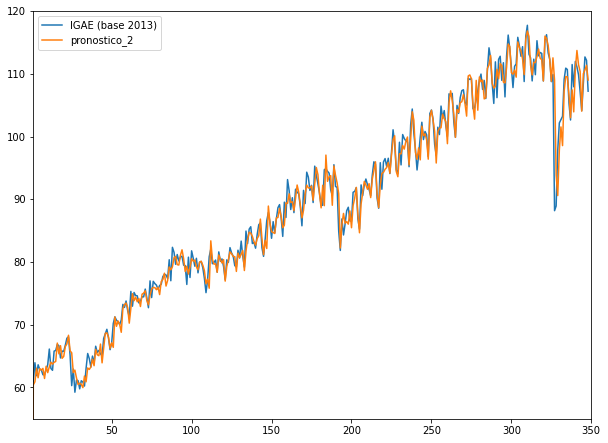

In [279]:
IGAE[['IGAE (base 2013)', 'pronostico_2']].plot()
plt.xlim([1,350])
plt.ylim([55,120])
plt.show()

In [282]:
## vamos a pronosticar para 5 meses
resultado2.predict(350, 354)

350    109.425581
351    103.469542
352    106.846714
353    106.890645
354    106.732335
Name: predicted_mean, dtype: float64

In [285]:
resultado2.predict(350,380)

350    109.425581
351    103.469542
352    106.846714
353    106.890645
354    106.732335
355    106.630569
356    102.376651
357    108.510617
358    111.258605
359    109.859272
360    107.837012
361    106.340276
362    109.555705
363    104.872634
364    107.456270
365    107.088162
366    107.317558
367    106.217607
368    101.506926
369    108.345794
370    110.116289
371    109.036561
372    108.022492
373    106.297422
374    109.827618
375    105.832551
376    107.717751
377    107.887772
378    107.952173
379    105.997598
380    101.481610
Name: predicted_mean, dtype: float64

A partir del mes 12 el pronóstico empieza a estimar al rededor de la media 